## Facial Expression Recognition Using Convolutional Neural Networks

In [4]:
import numpy as np
from numpy import reshape
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import np_utils as utils
from keras.layers import Dropout, Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Intro to neural networks

Inspired by the network of neurons in the brain, neural networks are comprised of layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network. During training, the weights of each node are adjusted using backpropagation and gradient descent to minimize the cost function.

<img src="images/unnamed (2).png" width=500>

Convolutional neural networks are a type of neural network that are able to identify certain features/aspects of an image. CNNs use a basic neural network to classify the input but use additional convolution and pooling layers to alter the input before it is fed into the neural network. The convolutional and pooling layers allow the network to extract the important features while reducing dimensionality to avoid overfitting and to save computational power.

A convolutional layer has several filters that do the convolutional operation. They are based on the discrete convolution of a small kernel k with a bidimensional input, and this input can be the output of another convolutional layer. The Kernel shifts across the input matrix, every time performing a matrix multiplication operation between the weights of the kernel and the portion of the input matrix over which the kernel is hovering:

<img src="images/unnamed (1).png" width=500>

Pooling layers serve the purpose of reducing dimensionality as well as summarizing the features in a given region so the model is less sensitive to small variance in the positioning of features. 

There are two types of Pooling: 
- Max Pooling returns the maximum value from the portion of the image covered by the pool.
- Average Pooling returns the average of all the values from the portion of the image covered by the pool.

<img src="images/1_KQIEqhxzICU7thjaQBfPBQ.png" width=500>

Convolution and pooling layers work together to extract the dominant features of an image while reducing dimensionality and decrease computational expenses and overfitting.

### Dataset

The dataset I used to train a CNN was from the Kaggle Facial Expression Recognition challenge from 2013. The dataset contains 28,709 images represented as a matrix with each pixel’s corresponding grayscale value. The dataset has seven classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral. Example of one image:

<img src="images/unnamed.png" width=250>


In [6]:
df = pd.read_csv("train.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


Pandas dataframes have trouble interpreting values in list form and it interprets the arrays from the csv file as strings. One way to work around this is to create a function that converts the string into an array of integers. I also created a simple function that shows the images by plotting the grayscale values on a graph using matplotlib.

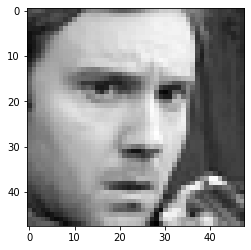

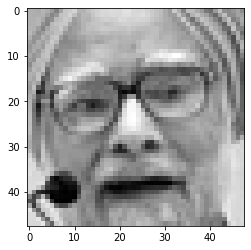

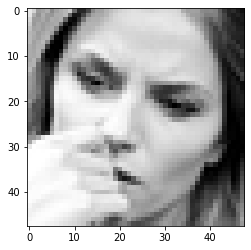

In [8]:
def convert_matrix(pixels):
    mat = pixels.split(' ')
    #convert each element to an integer
    mat = np.array([int(i) for i in mat])
    #reshape list into 2d array
    return mat.reshape(48,48)

def print_image(matrix):
    plt.imshow(matrix, cmap="gray") 
    plt.show()

for i in range(3):
    print_image(convert_matrix(df['pixels'][i]))

The X and y sets from the dataframe must be converted into the right data types using the convert_matrix function.

In [229]:
X = [convert_matrix(df['pixels'][i]) for i in range(len(df))]
X = np.array(X)

In [230]:
y = [np.array(int(emo)) for emo in df['emotion']]
y = np.array(y)

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

The input matrices need to be normalized and the outputs need to be converted into categorical data. For example, an output of class 3 would change from [3], to [0,0,1,0,0,0,0].

In [254]:
X_train, X_test = X_train.astype('float32')/255.0, X_test.astype('float32')/255.0
y_train, y_test = utils.to_categorical(y_train, 7), utils.to_categorical(y_test, 7)

The CNN model can follow many different structures and use different combinations of convolution and pooling layers. Another important aspect of CNNs is dropout. Dropout basically randomly ignores a certain portion of the nodes of the network when training. Dropout is very important for avoiding overfitting. Below is the best CNN structure I was able to configure, however, training the model takes a very long time and adding layers, which could increase accuracy, also increasing training time. If I had more time on this project and more time to train different and more complex(more layers) CNN configurations, I believe I would be able to increase the accuracy of the model. The final fully connected layer uses a crossentropy loss function, which is usually preferrable over MSE for classification problems, and gradient descent as the optimization function. The model is trained in epochs and displays the train and test accuracy after each epoch so the progress of the training can be tracked.

In [262]:
#initialize model
model = Sequential()
#first convolution layer with same padding
model.add(Conv2D(48, (3, 3), input_shape=(48, 48, 1), padding='same', activation='relu'))
model.add(Dropout(0.2))
#second convolution layer with valid padding
model.add(Conv2D(48, (3, 3), activation='relu', padding='valid'))
model.add(Dropout(0.2))
#third convolution layer with valid padding
model.add(Conv2D(48, (3, 3), activation='relu', padding='valid'))
#max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#fully connected layer
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))
#compile the model with cross entropy loss function and gradient descent optimizer function
model.compile(loss='categorical_crossentropy', optimizer=SGD(momentum=0.5, decay=0.0004), metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,batch_size=32)

Epoch 1/10
673/673 [==============================] - 20361s 30s/step - loss: 1.8275 - accuracy: 0.2425 - val_loss: 1.7523 - val_accuracy: 0.2696
Epoch 2/10
673/673 [==============================] - 237s 353ms/step - loss: 1.7226 - accuracy: 0.3132 - val_loss: 1.6809 - val_accuracy: 0.3483
Epoch 3/10
673/673 [==============================] - 241s 358ms/step - loss: 1.6832 - accuracy: 0.3422 - val_loss: 1.6745 - val_accuracy: 0.3417
Epoch 4/10
673/673 [==============================] - 240s 357ms/step - loss: 1.6650 - accuracy: 0.3488 - val_loss: 1.6472 - val_accuracy: 0.3583
Epoch 5/10
673/673 [==============================] - 362s 539ms/step - loss: 1.6483 - accuracy: 0.3607 - val_loss: 1.6410 - val_accuracy: 0.3594
Epoch 6/10
673/673 [==============================] - 411s 612ms/step - loss: 1.6359 - accuracy: 0.3609 - val_loss: 1.6474 - val_accuracy: 0.3614
Epoch 7/10
673/673 [==============================] - 241s 358ms/step - loss: 1.6226 - accuracy: 0.3681 - val_loss: 1.6386 -

Final accuracy:

In [263]:
print("Accuracy:", (model.evaluate(X_test, y_test))[1])

225/225 [==============================] - 15s 68ms/step - loss: 1.6120 - accuracy: 0.3690
Accuracy: 0.36904430389404297
